In [52]:
# Description:

# Source: 

# Format: csv
# Number of Rows: 39717
# Each row is: 
# Sampling Method: All the loan applications between <date> and <date>


In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")


In [152]:
#load data file
df_loan = pd.read_csv('loan.csv')

#check the data structure of the loan data.
df_loan.shape

#(39727, 111)

(39717, 111)

In [153]:
#check the loan data information of columns
df_loan.info(verbose=True, show_counts=True)

#It gives an idea which columns have null values and data type information.
#There are columns with all null values.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #    Column                          Non-Null Count  Dtype  
---   ------                          --------------  -----  
 0    id                              39717 non-null  int64  
 1    member_id                       39717 non-null  int64  
 2    loan_amnt                       39717 non-null  int64  
 3    funded_amnt                     39717 non-null  int64  
 4    funded_amnt_inv                 39717 non-null  float64
 5    term                            39717 non-null  object 
 6    int_rate                        39717 non-null  object 
 7    installment                     39717 non-null  float64
 8    grade                           39717 non-null  object 
 9    sub_grade                       39717 non-null  object 
 10   emp_title                       37258 non-null  object 
 11   emp_length                      38642 non-null  object 
 12   home_ownership  

In [154]:
#Describe the data structure of the loan data.
df_loan.describe()

#It gives the span of data like min and max of loan_amnt, funded_amnt_inv, installment on high level view
#I could also find that, there are columns with scientific values, which need to be taken care.

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,...,0.00,0.00,0.00,0.00,39020.00,39678.00,0.00,0.00,0.00,0.00
mean,683131.91,850463.56,11219.44,10947.71,10397.45,324.56,68968.93,13.32,0.15,0.87,...,NaN,NaN,NaN,NaN,0.04,0.00,NaN,NaN,NaN,NaN
std,210694.13,265678.31,7456.67,7187.24,7128.45,208.87,63793.77,6.68,0.49,1.07,...,NaN,NaN,NaN,NaN,0.20,0.00,NaN,NaN,NaN,NaN
min,54734.00,70699.00,500.00,500.00,0.00,15.69,4000.00,0.00,0.00,0.00,...,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
25%,516221.00,666780.00,5500.00,5400.00,5000.00,167.02,40404.00,8.17,0.00,0.00,...,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
50%,665665.00,850812.00,10000.00,9600.00,8975.00,280.22,59000.00,13.40,0.00,1.00,...,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
75%,837755.00,1047339.00,15000.00,15000.00,14400.00,430.78,82300.00,18.60,0.00,1.00,...,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
max,1077501.00,1314167.00,35000.00,35000.00,35000.00,1305.19,6000000.00,29.99,11.00,8.00,...,NaN,NaN,NaN,NaN,2.00,0.00,NaN,NaN,NaN,NaN


In [155]:
# Some columns show data in scientific format. Convert them to numeric type.
pd.options.display.float_format = '{:.2f}'.format

In [104]:
#Data Cleaning##

In [156]:
# Observe the null columns
# We found above that there are columns
df_loan.isnull().all().sum()

#There are 54 columns with all null/na values in loan data.

54

In [157]:
#List out all null columns
empty_columns = df_loan.columns[df_loan.isna().all()].tolist()
print(empty_columns)
#We will drop these columns

['mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq', 'mths_since_recent_inq', 'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit', 'total_il_high_credit_

In [158]:
# Dropping all null columns 

#df_loan.drop(df_loan.iloc[:, 57:77], inplace=True, axis=1)
df_loan.drop(empty_columns, inplace=True, axis=1)
# See new indexes of the columns
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 57 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

In [159]:
# Now find the columns which may not be participating in required analysis and also have lots of null value. Let's drop them.
# df_loan[df_loan["tax_liens"] > 0]
#df_loan['mths_since_last_record'][df_loan['mths_since_last_record'] > 0]
#df_loan['next_pymnt_d'].head(100)

drop_list2 = df_loan[['member_id', 'desc', 'mths_since_last_record', 'next_pymnt_d', 'application_type', 'url', 'emp_title', 'zip_code', 'tax_liens']]

df_loan.drop(drop_list2, inplace = True, axis=1)
df_loan.info()

#Above list is prepared by individual analysis on each column

# tax_liens - is 0 in all rows
# zip_code - is 123xx format in all the rows, which cannot be corrected and not playing any role in analysis
# member_id - does not make sense for our analysis
# desc - Description is not required.
# url - not required for our analysis
# next_pymnt_d - most of data is null in this column. Few Data like jun - 16, does not make sense for our analysis
# mths_since_last_record - Most values are null or zero. doesn't add value.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 48 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   loan_amnt                   39717 non-null  int64  
 2   funded_amnt                 39717 non-null  int64  
 3   funded_amnt_inv             39717 non-null  float64
 4   term                        39717 non-null  object 
 5   int_rate                    39717 non-null  object 
 6   installment                 39717 non-null  float64
 7   grade                       39717 non-null  object 
 8   sub_grade                   39717 non-null  object 
 9   emp_length                  38642 non-null  object 
 10  home_ownership              39717 non-null  object 
 11  annual_inc                  39717 non-null  float64
 12  verification_status         39717 non-null  object 
 13  issue_d                     397

In [160]:
# Observe the dataset after deleting null columns
df_loan.shape

#After deleting null and not required columns we have 48 columns left

(39717, 48)

In [161]:
# For further operations let's have a copy of the cleaned data till now.
# We will perform further clean up and other oprations on copied data to keep the dataset original data safe.

df_ln = df_loan


In [162]:
# Observation
# Find null values in emp_length column

df_ln['emp_length'].isna().sum()

# Observation:
# There are 1075 rows

1075

In [163]:
# Data Cleaning
# Replace null with 0
df_ln['emp_length'].fillna('0', inplace = True)

#check for nulls after replaced null with 0
df_ln['emp_length'].isna().sum()

# Observation
# All are replaced.

0

In [164]:
#Data Cleaning
# Remove extra characters.
df_ln['emp_length']=df_ln.emp_length.str.extract('(\d+)')

# Check the result after removing characters
df_ln['emp_length']

0        10
1         1
2        10
3        10
4         1
         ..
39712     4
39713     3
39714     1
39715     1
39716     1
Name: emp_length, Length: 39717, dtype: object

In [165]:
#change the type of the emp_length column

df_ln['emp_length'] = df_ln['emp_length'].astype(int) 

df_ln.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 48 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   loan_amnt                   39717 non-null  int64  
 2   funded_amnt                 39717 non-null  int64  
 3   funded_amnt_inv             39717 non-null  float64
 4   term                        39717 non-null  object 
 5   int_rate                    39717 non-null  object 
 6   installment                 39717 non-null  float64
 7   grade                       39717 non-null  object 
 8   sub_grade                   39717 non-null  object 
 9   emp_length                  39717 non-null  int32  
 10  home_ownership              39717 non-null  object 
 11  annual_inc                  39717 non-null  float64
 12  verification_status         39717 non-null  object 
 13  issue_d                     397

In [166]:
# Observe dataset
df_ln.head()

# Found int_Rate(Interest Rate) columns to be corrected.

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,...,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies
0,1077501,5000,5000,4975.00,36 months,10.65%,162.87,B,B2,10,...,0.00,Jan-15,171.62,May-16,0.00,1,0,0.00,0,0.00
1,1077430,2500,2500,2500.00,60 months,15.27%,59.83,C,C4,1,...,1.11,Apr-13,119.66,Sep-13,0.00,1,0,0.00,0,0.00
2,1077175,2400,2400,2400.00,36 months,15.96%,84.33,C,C5,10,...,0.00,Jun-14,649.91,May-16,0.00,1,0,0.00,0,0.00
3,1076863,10000,10000,10000.00,36 months,13.49%,339.31,C,C1,10,...,0.00,Jan-15,357.48,Apr-16,0.00,1,0,0.00,0,0.00
4,1075358,3000,3000,3000.00,60 months,12.69%,67.79,B,B5,1,...,0.00,May-16,67.79,May-16,0.00,1,0,0.00,0,0.00


In [167]:
# Data Cleaning
# Remove '%' from int_rate column
df_ln['int_rate'] = df_ln['int_rate'].str.rstrip('%')

# Observe data
df_ln.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,...,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies
0,1077501,5000,5000,4975.00,36 months,10.65,162.87,B,B2,10,...,0.00,Jan-15,171.62,May-16,0.00,1,0,0.00,0,0.00
1,1077430,2500,2500,2500.00,60 months,15.27,59.83,C,C4,1,...,1.11,Apr-13,119.66,Sep-13,0.00,1,0,0.00,0,0.00
2,1077175,2400,2400,2400.00,36 months,15.96,84.33,C,C5,10,...,0.00,Jun-14,649.91,May-16,0.00,1,0,0.00,0,0.00
3,1076863,10000,10000,10000.00,36 months,13.49,339.31,C,C1,10,...,0.00,Jan-15,357.48,Apr-16,0.00,1,0,0.00,0,0.00
4,1075358,3000,3000,3000.00,60 months,12.69,67.79,B,B5,1,...,0.00,May-16,67.79,May-16,0.00,1,0,0.00,0,0.00


In [168]:
# Data Cleaning
# Convert int_rate to float type
df_ln['int_rate'] = df_ln['int_rate'].astype(float)

# Check the type of the column after chaning it to float.
df_ln['int_rate'].dtypes

# Data type changed from object to float.

dtype('float64')

In [169]:
# Data cleaning
# Check for duplicate rows

df_ln.duplicated(subset=None, keep='first').count()

# There are no duplicate rows in the given dataset

39717

In [170]:
#### Univariate Analysis #####

#Let's note down the list of Loan and aother amount related columns to correlate them

# loan_amnt -The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.
# funded_amnt - The total amount committed to that loan at that point in time.
# funded_amnt_inv - The total amount committed by investors for that loan at that point in time.
# annual_inc - Annual income
# int_rate - Interest Rate


# We will also analyze the supporting column data and will try to derive some columns. So below is the initial list to anaylyze
# supporting columns

# Categorical ordered variable:
#    Grade - LC assigned loan grade

## Unordered Categorical Variables##

# loan_status
# pymnt_plan - during analysis below, I found column data is not useful for analysis. Column could be removed as part of data cleaning
# purpose
# home

In [171]:
# Univariate Analysis - loan_amnt
#Let's frist understand the spread of loan_amnt

df_ln.loan_amnt.describe()

# Observations:
# mean    11219.44
# std      7456.67
# min       500.00
# 25%      5500.00
# 50%     10000.00
# 75%     15000.00
# max     35000.00

# Loan amount is ranging from 500.00(min) to 35000.00(max)

count   39717.00
mean    11219.44
std      7456.67
min       500.00
25%      5500.00
50%     10000.00
75%     15000.00
max     35000.00
Name: loan_amnt, dtype: float64

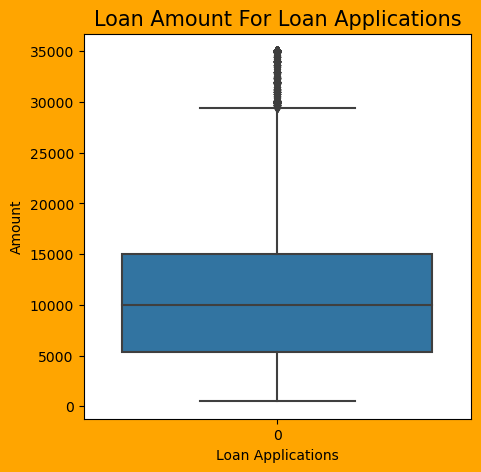

In [251]:
# Let's try to find the outliers if any with box plot
plt.figure(figsize=(5,5), facecolor='orange')
sb.boxplot(df_ln.loan_amnt)
plt.title('Loan Amount For Loan Applications', fontdict={'fontsize' : 15, 'fontweight' : 5, 'color' : 'black'})
plt.xlabel('Loan Applications')
plt.ylabel('Amount')
plt.show()
# Observations
# 

In [173]:
# Univariate Analysis - funded_amnt

df_ln.funded_amnt.describe()

# Observations:
# min and max are same as loan_amnt.
# There is no much probability of outliers. Let's see the box plot.

count   39717.00
mean    10947.71
std      7187.24
min       500.00
25%      5400.00
50%      9600.00
75%     15000.00
max     35000.00
Name: funded_amnt, dtype: float64

Text(0, 0.5, 'Amount')

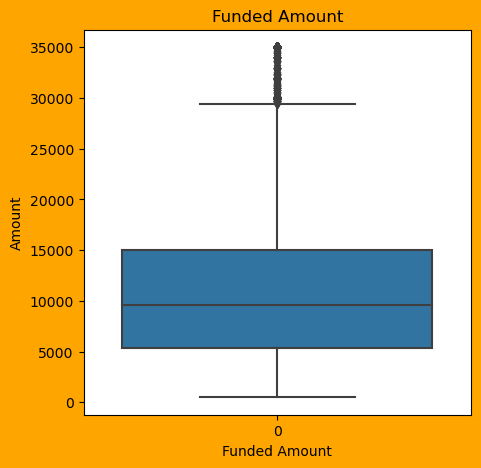

In [174]:
# Univariate Analysis - funded_amnt
plt.figure(figsize=(5,5), facecolor='orange')
sb.boxplot(df_ln.funded_amnt)
plt.title('Funded Amount')
plt.xlabel('Funded Amount')
plt.ylabel('Amount')

# Observations:
# Box plot for funded_amnt and loan_amount are closely matching.
# No need of data alteration based on it.

In [175]:
# Univariate Analysis - funded_amnt_inv
df_ln.funded_amnt_inv.describe()
#sb.boxplot(df_ln.funded_amnt_inv)

# Obasevations
# min values is 0. Otherwise data is more or less close to funded_amnt
# There are no extreams in the data.

count   39717.00
mean    10397.45
std      7128.45
min         0.00
25%      5000.00
50%      8975.00
75%     14400.00
max     35000.00
Name: funded_amnt_inv, dtype: float64

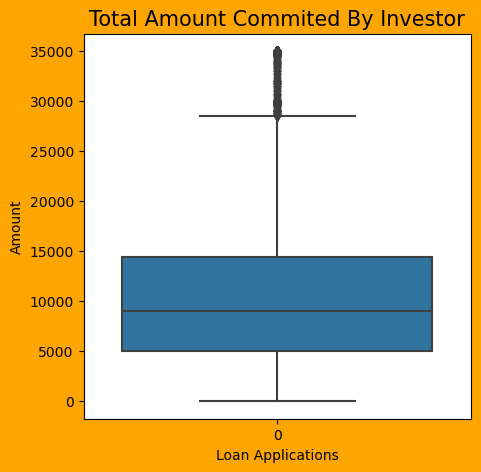

In [176]:
# Univariate Analysis - funded_amnt_inv
plt.figure(figsize=(5,5), facecolor='orange')
sb.boxplot(df_ln.funded_amnt_inv)
plt.title('Total Amount Commited By Investor', fontdict={'fontsize' : 15, 'fontweight' : 5, 'color' : 'black'})
plt.xlabel('Loan Applications')
plt.ylabel('Amount')
plt.show()

# Observations:

# Box plot is closely matching to funded_amnt and loan_amnt

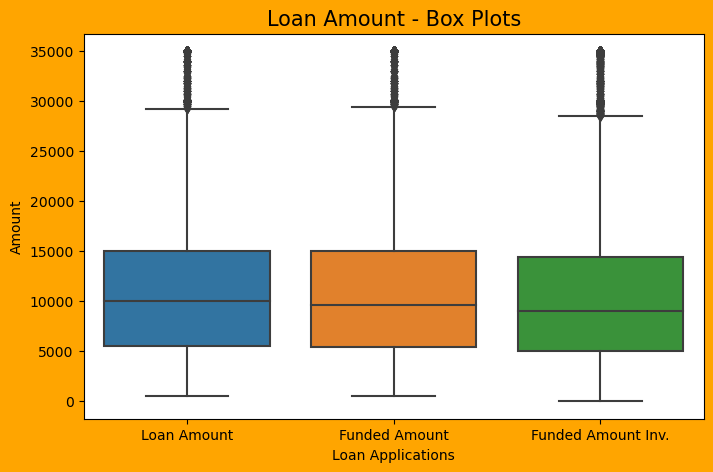

In [177]:
# Let's see all(loan_amnt, funded_amnt, funded_amnt_inv) box plots together.
plt.figure(figsize=(8,5), facecolor='orange')
ax = sb.boxplot([df_ln.loan_amnt, df_ln.funded_amnt, df_ln.funded_amnt_inv])
ax.set_title('Loan Amount - Box Plots', fontdict={'fontsize' : 15, 'fontweight' : 5, 'color' : 'black'})
ax.set_ylabel('Amount')
ax.set_xlabel('Loan Applications')
ax.set_xticks(range(3))
ax.set_xticklabels(['Loan Amount', 'Funded Amount', 'Funded Amount Inv.'])
plt.show()

# Observations:
# loan_amnt and funded_amnt looks almost similar but for funded_amnt_inv the 75th percentile and median are little lower than other two.
# This may be because of its min value is zero, we can assume it from the above analysis using describe() function. But more or less they are close.


Text(0, 0.5, 'Density of Loan Applications')

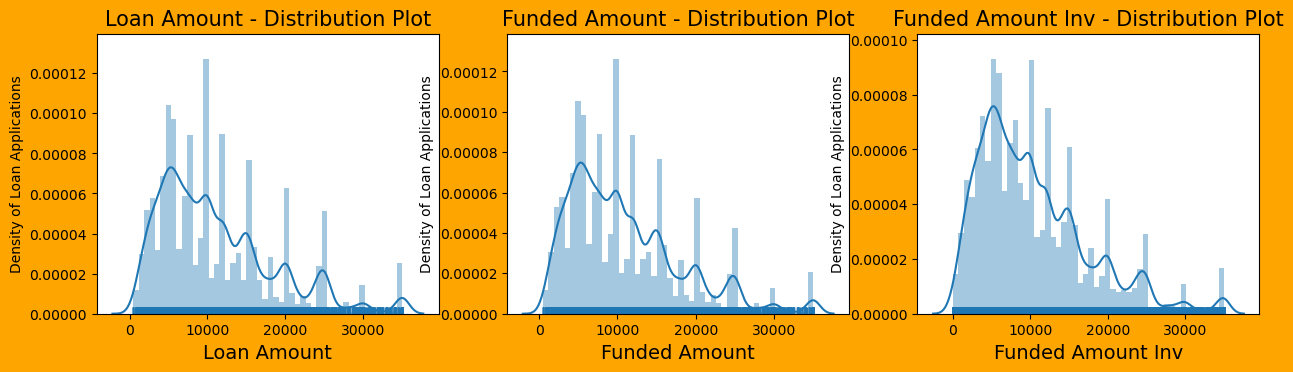

In [178]:
# Let's see distribution charts of all three(laon_amnt, funded_amnt, funded_amnt_inv) 

plt.figure(figsize=(15,8),facecolor='orange')
#sb.set_style("dark")
# DistPlot 1
plt.subplot(2, 3, 1)
ax = sb.distplot(df_ln['loan_amnt'],rug = True)
ax.set_title('Loan Amount - Distribution Plot',fontsize=15,color='black')
ax.set_xlabel('Loan Amount',fontsize=14,color='black')
ax.set_ylabel('Density of Loan Applications')

# DistPlot 2
plt.subplot(2, 3, 2)
ax = sb.distplot(df_ln['funded_amnt'],rug = True)
ax.set_title('Funded Amount - Distribution Plot',fontsize=15,color='black')
ax.set_xlabel('Funded Amount',fontsize=14,color='black')
ax.set_ylabel('Density of Loan Applications')

# DistPlot 3
plt.subplot(2, 3, 3)
ax = sb.distplot(df_ln['funded_amnt_inv'] ,rug = True)
ax.set_title('Funded Amount Inv - Distribution Plot',fontsize=15,color='black')
ax.set_xlabel('Funded Amount Inv',fontsize=14,color='black')
ax.set_ylabel('Density of Loan Applications')

# Observations:
# There is almost similar pattern of data spread for all the three parameters. Funded Amount Inv shows a little higher curve 
# near 10000 but it can be ignored. 
# We can consider Loan Amount for futher analysis.

In [179]:
# Univariate Analysis - annual_inc
df_ln.annual_inc.describe()

# Observations:
# There is a huge difference between minimum(4000) and maximum(6000000) values. It is clear that there are some outliers.
# Our maximum loan amount is 35000. So it can also make you think that someone having annual income of 600000 would not be
# interested in such small loan.

count     39717.00
mean      68968.93
std       63793.77
min        4000.00
25%       40404.00
50%       59000.00
75%       82300.00
max     6000000.00
Name: annual_inc, dtype: float64

Before removing outliers:


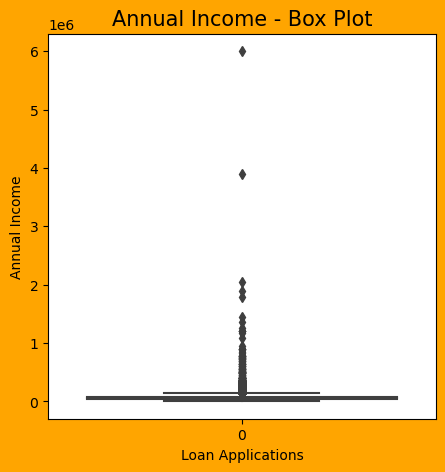

In [180]:
# Univariate Analysis - annual_inc
# Let's try to see above observation on box plot
print('Before removing outliers:')
plt.figure(figsize=(5,5), facecolor='orange')
sb.boxplot(df_ln.annual_inc)
plt.title('Annual Income - Box Plot', fontdict={'fontsize' : 15, 'fontweight' : 5, 'color' : 'black'})
plt.xlabel('Loan Applications')
plt.ylabel('Annual Income')
plt.show()

# Observation:
# In Box plot Q1 and Q3 and median lines look very close due to outliers having huge difference. 
# We can clearly see outliers in the plot.
# Outliers are above Q3 only
# Let's try to remove outliers.

In [181]:
# Univariate Analysis - annual_inc

# If we follow the formula #upper_limit = q3 + 1.5*iqr, we are missing out on data near to the whisker line.
# We can follow the percentile method with upper limit with 0.99 percentile and lower limit with 0.01 percentile. 
# But we don't see any outliers below 25 percentile line and near bottom whiker line, so we will take only upper limit.
# ref: https://www.analyticsvidhya.com/blog/2021/05/feature-engineering-how-to-detect-and-remove-outliers-with-python-code/

upper_limit = df_ln['annual_inc'].quantile(0.99)

#df = df_ln

# Data Cleaning.
df_ln = df_ln[df_ln.annual_inc < upper_limit]

# After removing outliers.
df_ln.annual_inc.describe()

# Observations:
# Now max annual income amount is 234996.
# Total records aer reduced to 39319

count    39319.00
mean     65524.22
std      35215.89
min       4000.00
25%      40000.00
50%      58000.00
75%      81000.00
max     234996.00
Name: annual_inc, dtype: float64

After removing outliers



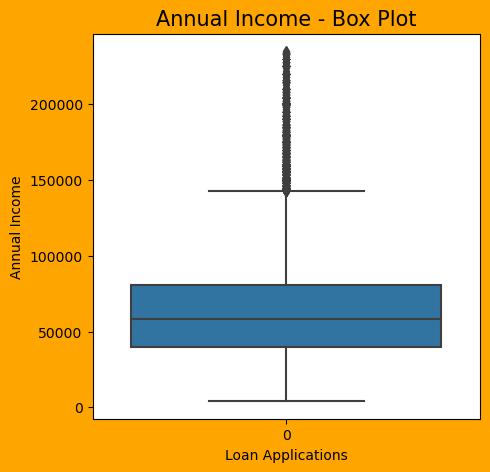

In [182]:
print('After removing outliers\n')
plt.figure(figsize=(5,5), facecolor='orange')
sb.boxplot(df_ln.annual_inc)
plt.title('Annual Income - Box Plot', fontdict={'fontsize' : 15, 'fontweight' : 5, 'color' : 'black'})
plt.xlabel('Loan Applications')
plt.ylabel('Annual Income')
plt.show()

# Observations:
# It is clearly visible that outliers could affect the analysis.

Text(0, 0.5, 'Loan Applications')

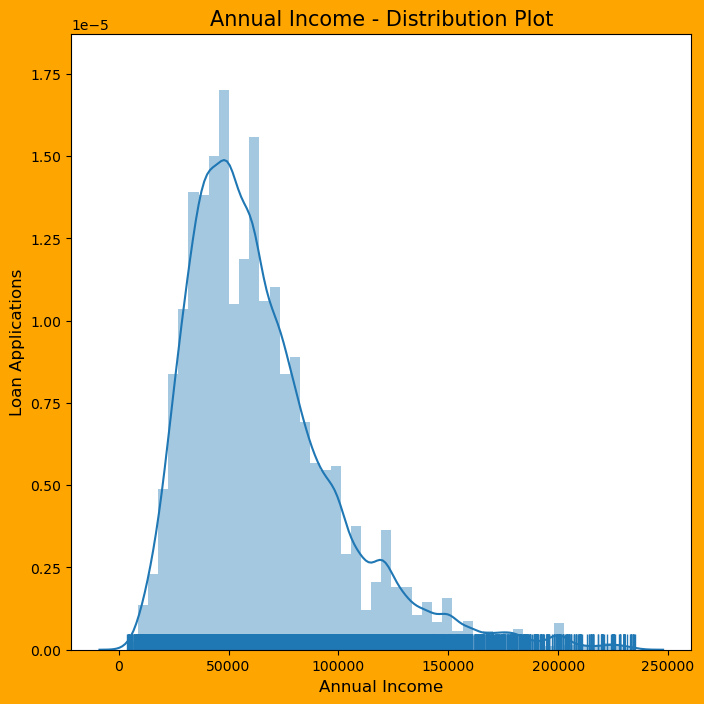

In [183]:
# Let's see the spread of annual_inc after removal of outliers

plt.figure(figsize=(8,8),facecolor='orange')

ax = sb.distplot(df_ln.annual_inc, rug=True)
ax.set_title('Annual Income - Distribution Plot',fontsize=15,color='black')
ax.set_xlabel('Annual Income',fontsize=12,color='black')
ax.set_ylabel('Loan Applications', fontsize=12, color='black')


After outliers dropped...


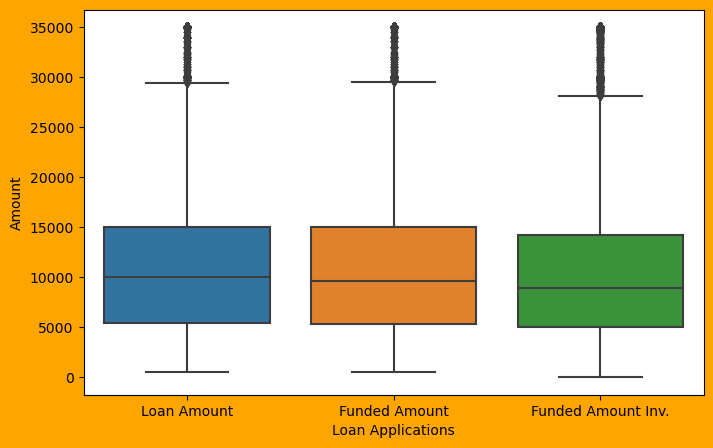

In [234]:
# Univariate analysis - After removing outliers let's look at the box plot of (loan_amnt, funded_amnt and funded_amnt_inv) together.

print("After outliers dropped...")

# Let's see all(loan_amnt, funded_amnt, funded_amnt_inv) box plots together.
plt.figure(figsize=(8,5), facecolor='orange')
ax = sb.boxplot([df_ln.loan_amnt, df_ln.funded_amnt, df_ln.funded_amnt_inv])
ax.set_ylabel('Amount')
ax.set_xlabel('Loan Applications')
ax.set_xticks(range(3))
ax.set_xticklabels(['Loan Amount', 'Funded Amount', 'Funded Amount Inv.'])
plt.show()

# Observations:
# loan_amnt and funded_amnt still looks almost similar but for funded_amnt_inv the 75th percentile and median are little lower than other two.
# This may be because of its min value is zero, we can assume it from the above analysis using describe() function. But more or less they are close.


After outliers dropped...


Text(0, 0.5, 'Desity of Loan Applications')

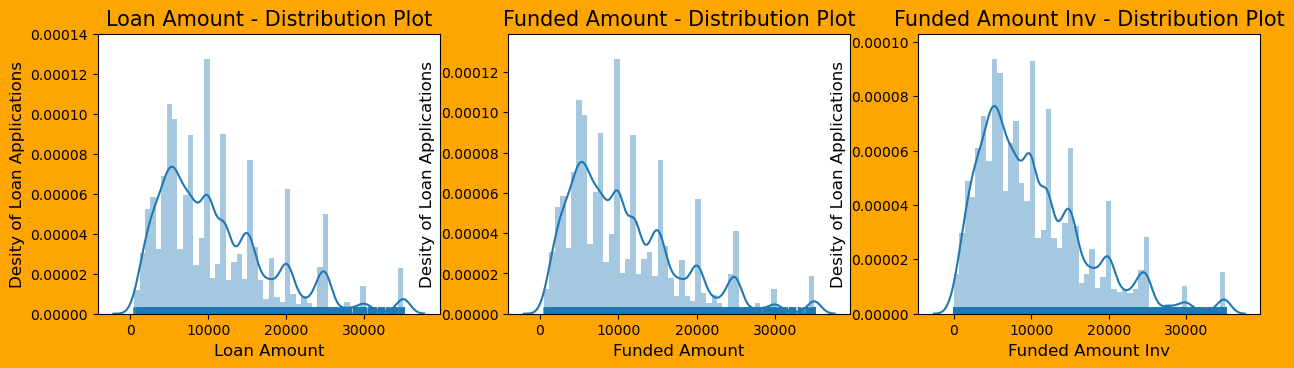

In [233]:
# Let's see distribution charts of all three(laon_amnt, funded_amnt, funded_amnt_inv) 

print("After outliers dropped...")

plt.figure(figsize=(15,8),facecolor='orange')
plt.subplot(2, 3, 1)
ax = sb.distplot(df_ln['loan_amnt'],rug = True)
ax.set_title('Loan Amount - Distribution Plot',fontsize=15,color='black')
ax.set_xlabel('Loan Amount',fontsize=12,color='black')
ax.set_ylabel('Desity of Loan Applications', fontsize=12, color='black')

# DistPlot 2
plt.subplot(2, 3, 2)
ax = sb.distplot(df_ln['funded_amnt'],rug = True)
ax.set_title('Funded Amount - Distribution Plot',fontsize=15,color='black')
ax.set_xlabel('Funded Amount',fontsize=12,color='black')
ax.set_ylabel('Desity of Loan Applications', fontsize=12, color='black')

# DistPlot 3
plt.subplot(2, 3, 3)
ax = sb.distplot(df_ln['funded_amnt_inv'],rug = True)
ax.set_title('Funded Amount Inv - Distribution Plot',fontsize=15,color='black')
ax.set_xlabel('Funded Amount Inv',fontsize=12,color='black')
ax.set_ylabel('Desity of Loan Applications', fontsize=12, color='black')

In [186]:
# Univariate Analysis - int_rate (interest rate)

df_ln.int_rate.describe()

count   39319.00
mean       12.01
std         3.72
min         5.42
25%         9.25
50%        11.83
75%        14.54
max        24.59
Name: int_rate, dtype: float64

In [187]:
df_ln.int_rate[df_ln.int_rate >23]

223     23.91
540     23.52
601     23.13
733     23.91
1156    23.91
1199    23.52
1619    24.11
1691    23.13
1799    24.11
2075    23.91
2447    23.13
2603    23.91
2749    23.52
2801    23.52
3006    23.52
3017    23.52
3094    23.13
3655    23.91
4214    23.52
4314    23.13
4652    23.91
4873    23.52
5267    23.91
5284    23.13
5570    23.13
5964    24.11
5966    23.13
6456    23.91
7446    23.52
7458    23.91
7466    23.13
7910    23.22
8305    23.22
9854    23.59
10380   23.22
10533   23.59
10553   23.22
10661   23.22
11435   23.22
12278   23.22
13136   23.22
13371   23.22
13486   24.59
13492   24.40
14600   23.59
15414   23.59
Name: int_rate, dtype: float64

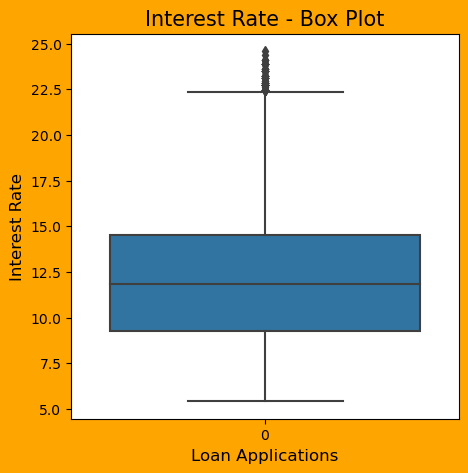

In [188]:
# Univariate Analysis - int_rate (interest rate)
plt.figure(figsize=(5,5), facecolor='orange')
sb.boxplot(df_ln.int_rate)
plt.title('Interest Rate - Box Plot',fontdict={'fontsize' : 15, 'fontweight' : 5, 'color' : 'black'})
plt.xlabel('Loan Applications',fontsize=12,color='black')
plt.ylabel('Interest Rate',fontsize=12,color='black')
plt.show()

# Observations:
# Most of the loan's interest rates are between 9% to 15%
# There are some loans showing up on very high interest rates, which looks like outliers.

Text(0, 0.5, 'Desity of Loan Applications')

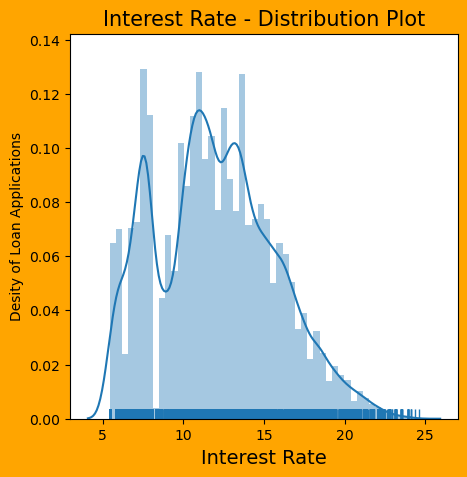

In [189]:
# Univariate Analysis - int_rate
plt.figure(figsize=(5,5), facecolor='orange')
ax = sb.distplot(df_ln.int_rate,rug = True)
ax.set_title('Interest Rate - Distribution Plot',fontsize=15,color='black')
ax.set_xlabel('Interest Rate',fontsize=14,color='black')
ax.set_ylabel("Desity of Loan Applications")

# Observation:
# Same as we observed most of the loan applications have interest rates between 9% to 15%
# loans with higher interest rates like >20% are very few.
# We will be using interest rates for bivariate analysis with loan status and grade.

In [190]:
df_ln['dti']

0       27.65
1        1.00
2        8.72
3       20.00
4       17.94
         ... 
39712   11.33
39713    6.40
39714    2.30
39715    3.72
39716   14.29
Name: dti, Length: 39319, dtype: float64

In [191]:
# Univariate Analysis 
# Let's look at loan_status

print(df_ln['loan_status'])

# Observations:
# We can see there are some predefined loan statuses are mentioned like 'Fully Paid', 'Charged Off', 'Current' etc.
# Considering the type of loan_status data, we can do our first univariate analysis on it. Loan statuses can be considered 
# "Unordered Categorical Variables"

0         Fully Paid
1        Charged Off
2         Fully Paid
3         Fully Paid
4            Current
            ...     
39712     Fully Paid
39713     Fully Paid
39714     Fully Paid
39715     Fully Paid
39716     Fully Paid
Name: loan_status, Length: 39319, dtype: object


In [192]:
# Univariate Analysis



In [193]:
# Univariate Analysis - loan_status - Unordered categorical variable.
# loan_status - Let's see how these categories are spread across the dataset with visuals.

status_counts = df_ln.loan_status.value_counts()
print(status_counts)
# Obsevations:
# You can see  there are some loans charged off, maximum loans are Fully paid.
# We will be interested in knowing the characteristics of the loans which are charged off. Like what was the loan amounts, 
# what was the interest rates etc.

Fully Paid     32609
Charged Off     5584
Current         1126
Name: loan_status, dtype: int64


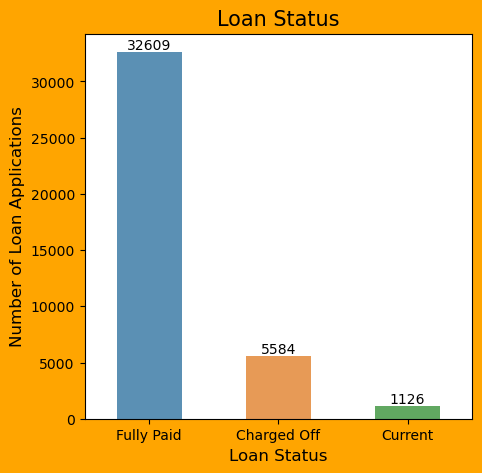

In [194]:
# Let's see the visual presentation of the each loan status. 

plt.figure(figsize=(5,5), facecolor='orange')
ax = sb.barplot(x=status_counts.index, y=status_counts.values, alpha=0.8, width=0.5)
plt.title('Loan Status', fontdict={'fontsize' : 15, 'fontweight' : 5, 'color' : 'black'})
plt.ylabel('Number of Loan Applications', fontsize=12)
plt.xlabel('Loan Status', fontsize=12)
ax.bar_label(ax.containers[0])
plt.show()

# Observation:
# There is a very small but significant number of charged off loans, which we will consider defaulted borrowers.
# Fully paid and charged off loans will be useful for bivariate analysis with different parameters to understand the characteristics of borrowers.

In [195]:
# Univariate Analysis - pymnt_plan

df_ln['pymnt_plan'].head()

# pymnt_plan does not have important data for analysis, we can safely remove this column.

0    n
1    n
2    n
3    n
4    n
Name: pymnt_plan, dtype: object

In [196]:
# Data cleaning
df_ln.drop('pymnt_plan', inplace = True, axis=1)
df_ln.shape

(39319, 47)

In [197]:
# Univariate Analysis - purpose - categorical unordered variable

purpose_counts = df_ln['purpose'].value_counts()
print(purpose_counts)

# Observations:
# From the data we can say it is "Unordered Categorical Variable".
# There are 14 different purposes for the loans. 
# Let's plot a graph to visualize them better way.    

debt_consolidation    18497
credit_card            5089
other                  3958
home_improvement       2894
major_purchase         2166
small_business         1797
car                    1542
wedding                 937
medical                 686
moving                  577
vacation                381
house                   371
educational             323
renewable_energy        101
Name: purpose, dtype: int64


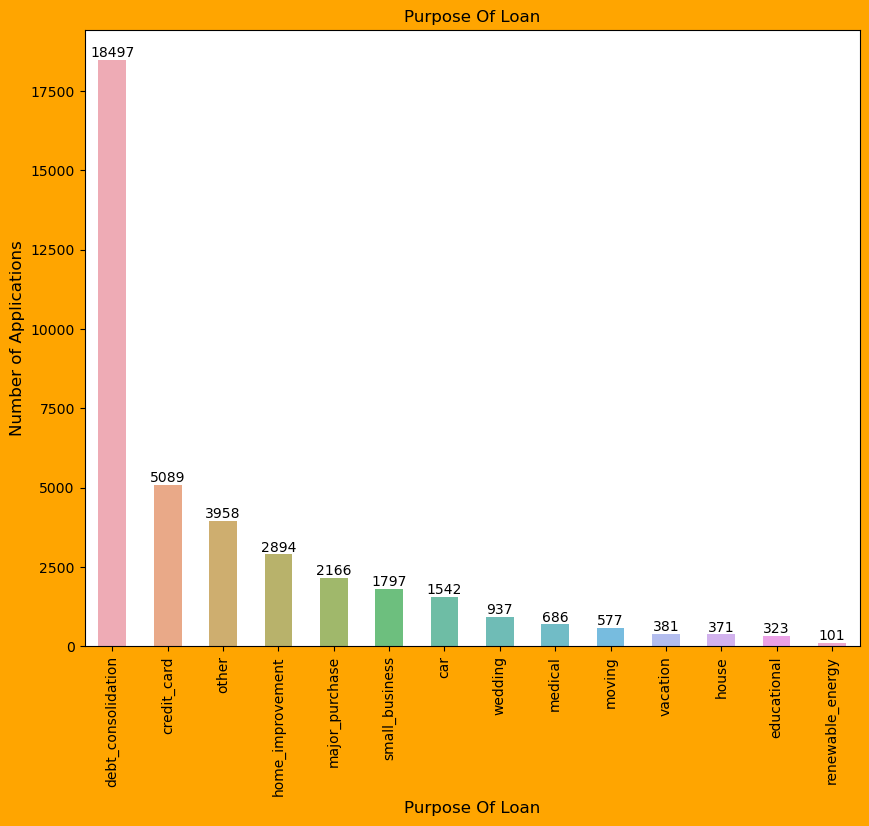

In [198]:
# Plotting purpose data on seaborn bar chart.

plt.figure(figsize=(10,8), facecolor='Orange')
ax = sb.barplot(x=purpose_counts.index, y=purpose_counts.values, alpha=0.8, width=0.5)
ax.set_title('Purpose Of Loan')
ax.set_ylabel('Number of Applications', fontsize=12)
ax.set_xlabel('Purpose Of Loan', fontsize=12)
ax.bar_label(ax.containers[0])
plt.xticks(rotation=90)
plt.show()


# Observations:
# Maximum loans are taken for debt consolidation and credit cards.
# There are more chances for defaulters also from these two categories. We will see it in Bivariate Analysis.


In [199]:
#Univariate Analysis - Column:grade - Type: categorical ordered variable.

df_ln.head()

# Observations:
# You can relate the grade with the interest rate. As the interest rate is increasing  the grade is falling that's like A, B, C,...
# where A seems to be better grade and gradually as it goes B, C, D, .... and so on, it seems not so good loan applications.
# Let's see the spread of grade across loan application counts.

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,...,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies
0,1077501,5000,5000,4975.00,36 months,10.65,162.87,B,B2,10,...,0.00,Jan-15,171.62,May-16,0.00,1,0,0.00,0,0.00
1,1077430,2500,2500,2500.00,60 months,15.27,59.83,C,C4,1,...,1.11,Apr-13,119.66,Sep-13,0.00,1,0,0.00,0,0.00
2,1077175,2400,2400,2400.00,36 months,15.96,84.33,C,C5,10,...,0.00,Jun-14,649.91,May-16,0.00,1,0,0.00,0,0.00
3,1076863,10000,10000,10000.00,36 months,13.49,339.31,C,C1,10,...,0.00,Jan-15,357.48,Apr-16,0.00,1,0,0.00,0,0.00
4,1075358,3000,3000,3000.00,60 months,12.69,67.79,B,B5,1,...,0.00,May-16,67.79,May-16,0.00,1,0,0.00,0,0.00


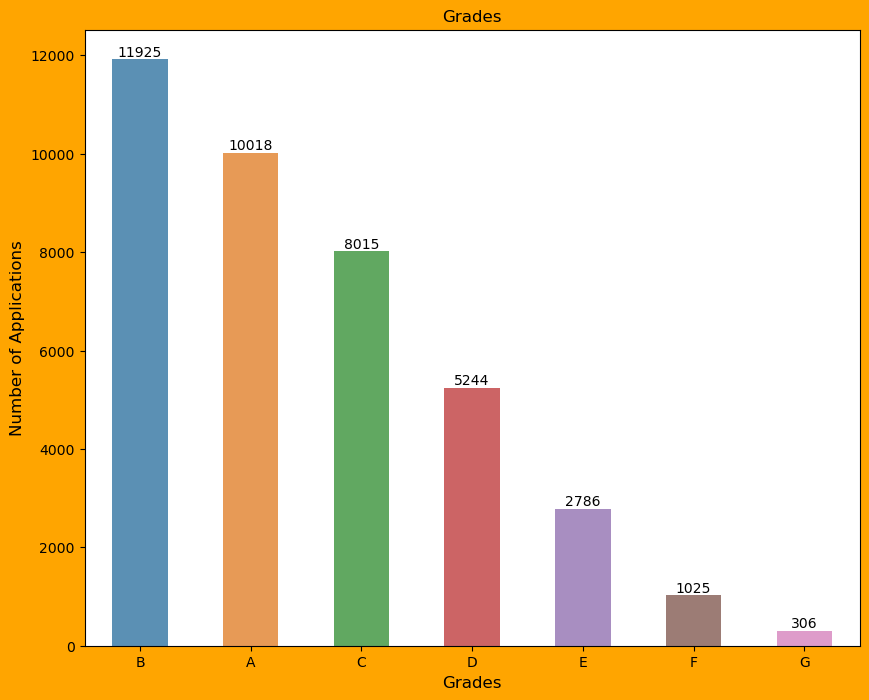

In [200]:
# Univariate Analysis - Column: grade, Type: categorical ordered variable

grade_counts = df_ln.grade.value_counts()

plt.figure(figsize=(10,8), facecolor='Orange')
ax = sb.barplot(x=grade_counts.index, y=grade_counts.values, alpha=0.8, width=0.5)
ax.set_title('Grades')
ax.set_ylabel('Number of Applications', fontsize=12)
ax.set_xlabel('Grades', fontsize=12)
ax.bar_label(ax.containers[0])
plt.show()

# Observations:

# Most of the loans are falling under A, B and C grades of interest rates. Very few are having higer interest rates.

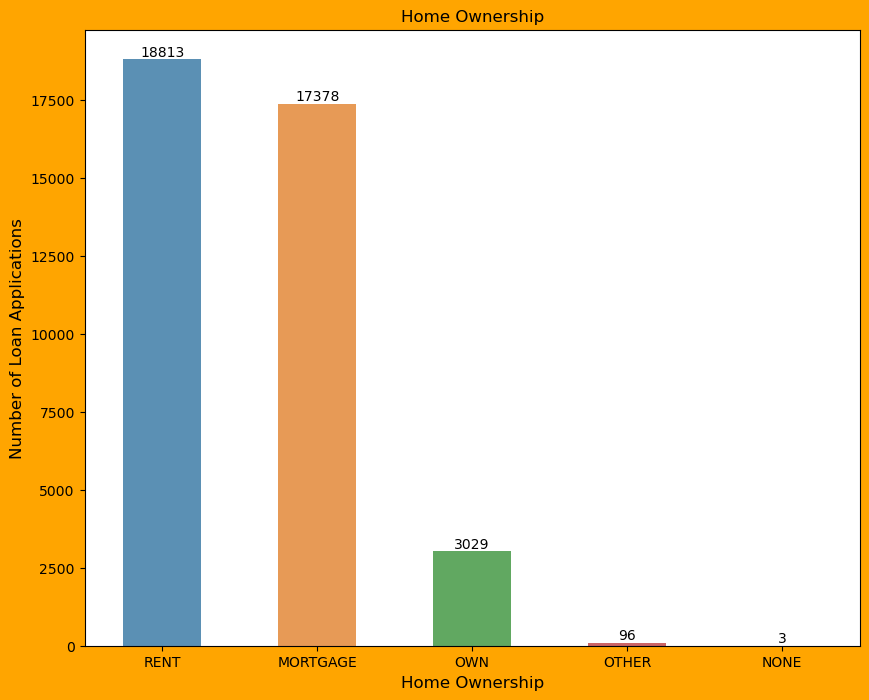

In [201]:
# Univariate Analysis - Column: home_ownership, Type: Categorical Unordered Variable.

home_own_counts =df_ln.home_ownership.value_counts()

plt.figure(figsize=(10,8), facecolor='Orange')
ax = sb.barplot(x=home_own_counts.index, y=home_own_counts.values, alpha=0.8, width=0.5)
ax.set_title('Home Ownership')
ax.set_ylabel('Number of Loan Applications', fontsize=12)
ax.set_xlabel('Home Ownership', fontsize=12)
ax.bar_label(ax.containers[0])
plt.show()

# Observeration:
# Most of the borrowers are staying in rented or mortgaged houses. 
# Very few owns the house.

In [202]:
### Segmented Univariate Analysis ###

# We will do segmented univariate analysis on following fields:

# annual_inc (annual income)
# term (Loan paying term)
# purpose



In [203]:
# Segmented Univariate Analysis - Annual Income vs. Loan Status

# Derive column from annual_inc (Annual income)
# Categorise loan_amnt. - Divide the annual_amnt into smaller buckets and label them.
# Consider distribution charts to consider the bucketing ranges.

df_ln['annual_inc_categories'] = pd.cut(df_ln.annual_inc, [0, 25000, 50000, 75000, 100000, 250000], labels=['0-25000', '25000-50000', '50000-75000', '75000-100000', '100000+']) 

df_ln.head()



,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,...,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,annual_inc_categories
0,1077501,5000,5000,4975.00,36 months,10.65,162.87,B,B2,10,...,Jan-15,171.62,May-16,0.00,1,0,0.00,0,0.00,0-25000
1,1077430,2500,2500,2500.00,60 months,15.27,59.83,C,C4,1,...,Apr-13,119.66,Sep-13,0.00,1,0,0.00,0,0.00,25000-50000
2,1077175,2400,2400,2400.00,36 months,15.96,84.33,C,C5,10,...,Jun-14,649.91,May-16,0.00,1,0,0.00,0,0.00,0-25000
3,1076863,10000,10000,10000.00,36 months,13.49,339.31,C,C1,10,...,Jan-15,357.48,Apr-16,0.00,1,0,0.00,0,0.00,25000-50000
4,1075358,3000,3000,3000.00,60 months,12.69,67.79,B,B5,1,...,May-16,67.79,May-16,0.00,1,0,0.00,0,0.00,75000-100000


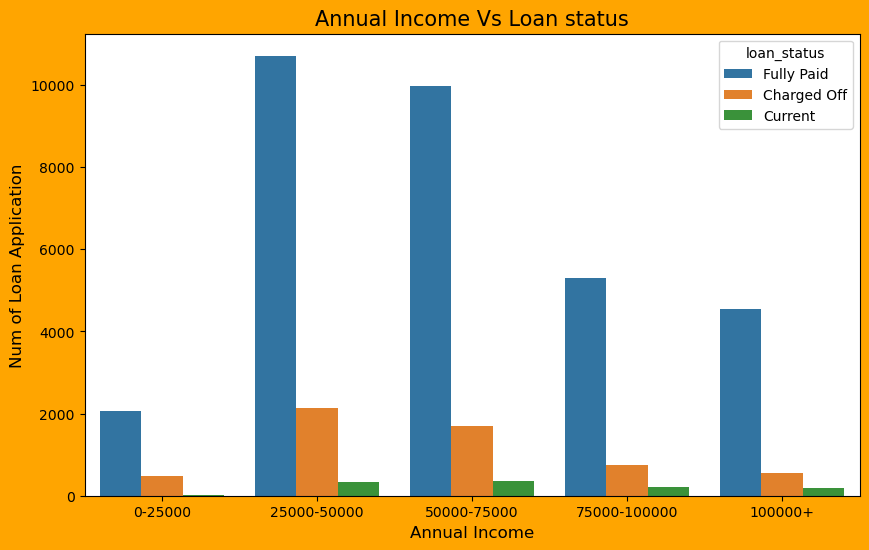

In [204]:
# Segmented Univariate Analysis - Annual Income vs. Loan Status

# Let's now visualize the Annual income vs. loan status.

plt.figure(figsize=(10,6),facecolor='orange')
ax = sb.countplot(x="annual_inc_categories",data=df_ln,hue='loan_status')
ax.set_title('Annual Income Vs Loan status',fontsize=15,color='black')
ax.set_xlabel('Annual Income',fontsize=12,color = 'black')
ax.set_ylabel('Num of Loan Application',fontsize=12,color = 'black')
plt.show()

# Observations:
# Compared to distribution chart, it is more clear here that very few loan are approved for lower income applicant.
# Maximum loans are approved for the income range 25000-50000 and 50000-75000. 
# As the income increases, it can be assumed that those applicants are less.

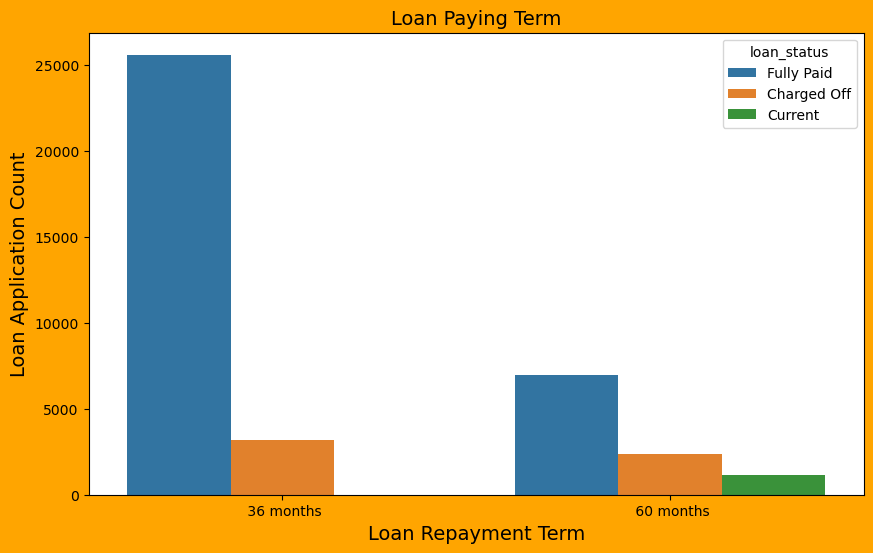

In [205]:
# Segmented Univariate Analysis - Column: term vs loan status

plt.figure(figsize=(10,6),facecolor='orange')
ax = sb.countplot(x="term",data=df_ln,hue='loan_status')
ax.set_title('Loan Paying Term',fontsize=14,color='black')
ax.set_xlabel('Loan Repayment Term',fontsize=14,color = 'black')
ax.set_ylabel('Loan Application Count',fontsize=14,color = 'black')
plt.show()

# Observations:
# It shows longer the term for repayment, more are the chances to default the loan.
# Here with 60 months of repayment duration has more Chareged Off laons compared to the total loans in that segment.

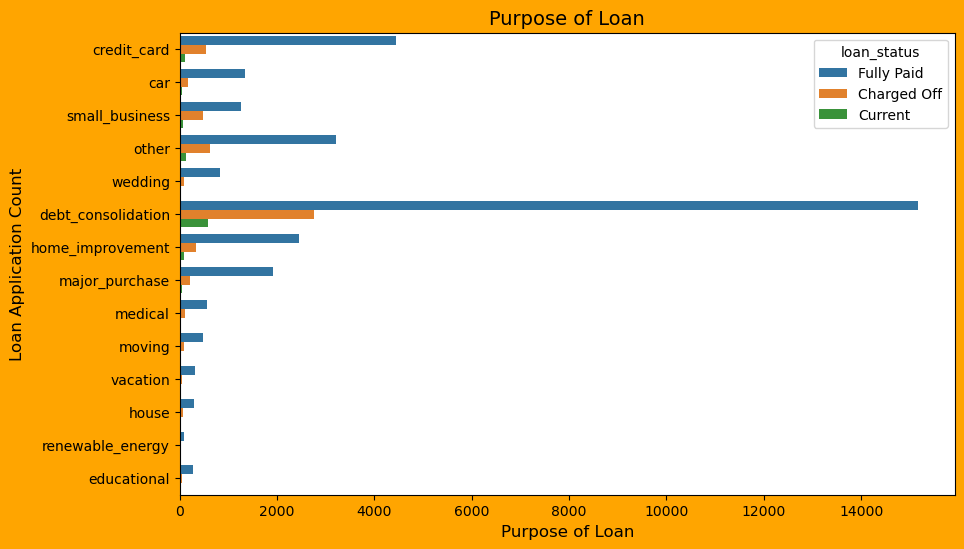

In [231]:
# Segmented Univariate Analysis - Purpose vs. loan_status

plt.figure(figsize=(10,6),facecolor='orange')
ax = sb.countplot(y="purpose",data=df_ln,hue='loan_status')
ax.set_title('Purpose of Loan',fontsize=14,color='black')
ax.set_xlabel("Purpose of Loan",fontsize=12,color = 'black')
ax.set_ylabel('Loan Application Count',fontsize=12,color = 'black')
plt.show()

In [206]:
### Bivariate Analysis ###

# We will do Bivariate Analysis on following variables/fields

# Annual income vs. Charged-off Percentatge
# Loan Amount vs. Charged-off Percentatge
# purpose vs. Charged-off Percentage
# Interest Rate vs. Charged-off Percentage
# Grade vs. Charged-off Percentage
# employment length vs. Charged-off Percentage
# home_ownership vs. Charged-off Percentage
# pub_rec_bankruptcies (Bankruptcy records) vs. Charged off Percentage


In [207]:
# Bivariate Analysis - Annual income vs. Charged Off loans

In [208]:
# Bivariate Analysis - Annual income vs. Charged Off loans

# Summarise the loan status data for each segment of annual income

inc_vs_loan_status = df_ln.groupby(['annual_inc_categories', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()

print(inc_vs_loan_status)


# Observations:
# Maximum number of loans are in the income category of 25000-50000
# But this doen't give the correct idea that which category more loans are default.
# We need to find the percentage of charged off loans in each category. 

loan_status annual_inc_categories  Charged Off  Current  Fully Paid
0                         0-25000          488       26        2062
1                     25000-50000         2125      329       10714
2                     50000-75000         1686      359        9982
3                    75000-100000          736      220        5303
4                         100000+          549      192        4548


In [209]:
# Custom function for finding percentage of Charged off loans.
# Create a custom function:
def total_percentage(df):
    #print(df)
    df['Total'] = df['Charged Off'] + df['Current'] + df['Fully Paid']     
    df['Chargedoff_Percentage'] = 100*(df['Charged Off'] / df['Total'])
    #print(df)
    return df

In [210]:
# Find the percentage of charged off loans.

inc_vs_loan_status = total_percentage(inc_vs_loan_status)
print(inc_vs_loan_status)

loan_status annual_inc_categories  Charged Off  Current  Fully Paid  Total  \
0                         0-25000          488       26        2062   2576   
1                     25000-50000         2125      329       10714  13168   
2                     50000-75000         1686      359        9982  12027   
3                    75000-100000          736      220        5303   6259   
4                         100000+          549      192        4548   5289   

loan_status  Chargedoff_Percentage  
0                            18.94  
1                            16.14  
2                            14.02  
3                            11.76  
4                            10.38  


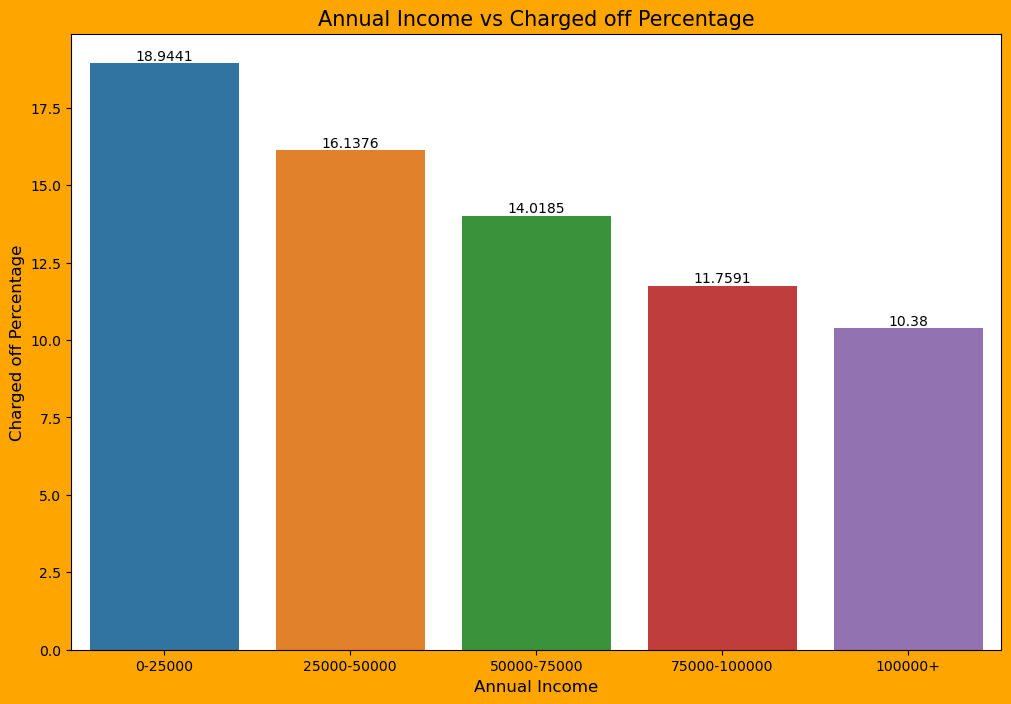

In [211]:
#Bivariate Analysis - Annual Income vs. Charged off 

plt.figure(figsize=(12,8), facecolor='Orange')
ax=sb.barplot(x='annual_inc_categories', y='Chargedoff_Percentage', data=inc_vs_loan_status)
ax.set_title('Annual Income vs Charged off Percentage',fontsize=15,color = 'black')
ax.set_xlabel('Annual Income',fontsize=12,color='black')
ax.set_ylabel('Charged off Percentage',fontsize=12,color = 'black')
ax.bar_label(container=ax.containers[0])
plt.show()

# Observations:
# Now it is clearly visible that the applicants in the income range of 0-25000 (there is no zero income for any applicant) are more
# defaulting to repay the loan compared to higher income ranges.
# As the annual income increases the probability of defaulting the loan is decreasing.
# It is safer lending money to applicant with higer annual income.

In [212]:
# Bivariate Anayalysis - Loan Amount vs. Charged off loans.

# First we will derive a column from loan_amnt

In [213]:
# Bivariate Anayalysis - Loan Amount vs. Charged off loans.

# Derive column for Bivariate Analysis
# Categorise loan_amnt. - Divide the loan amount range (min to max) into small buckets and label them.
# loan_amnt, funded_amnt and funded_amnt_inv are closely related. So we will take loan_amnt for further analysis among the 3 coluns.
# Consider distribution charts to consider the bucketing ranges.

df_ln['loan_amnt_categories'] = pd.cut(df_ln.loan_amnt, [0, 5000, 15000, 25000, 30000, 35000], labels=['0-5000', '5000-15000', '15000-25000', '25000-30000', '30000+']) 

df_ln.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,annual_inc_categories,loan_amnt_categories
0,1077501,5000,5000,4975.00,36 months,10.65,162.87,B,B2,10,...,171.62,May-16,0.00,1,0,0.00,0,0.00,0-25000,0-5000
1,1077430,2500,2500,2500.00,60 months,15.27,59.83,C,C4,1,...,119.66,Sep-13,0.00,1,0,0.00,0,0.00,25000-50000,0-5000
2,1077175,2400,2400,2400.00,36 months,15.96,84.33,C,C5,10,...,649.91,May-16,0.00,1,0,0.00,0,0.00,0-25000,0-5000
3,1076863,10000,10000,10000.00,36 months,13.49,339.31,C,C1,10,...,357.48,Apr-16,0.00,1,0,0.00,0,0.00,25000-50000,5000-15000
4,1075358,3000,3000,3000.00,60 months,12.69,67.79,B,B5,1,...,67.79,May-16,0.00,1,0,0.00,0,0.00,75000-100000,0-5000


In [214]:
# Bivariate Analysis - loan amount vs. charged off loan

# Find the count of each loan status against each loan amount category

lnAmnt_loan_status = df_ln.groupby(['loan_amnt_categories', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()

print(lnAmnt_loan_status)

# Observations:
# Maximum number of loans are of the amount between 5000-15000.
# Loans more than 25000 are very less.
# Let's find the percentage of Charged Off loans per segment.

loan_status loan_amnt_categories  Charged Off  Current  Fully Paid
0                         0-5000         1310       96        8126
1                     5000-15000         2687      458       17681
2                    15000-25000         1273      400        5773
3                    25000-30000          141       84         530
4                         30000+          173       88         499


In [215]:
# Find the percentage of charged of loans against loan amount

lnAmnt_loan_status = total_percentage(lnAmnt_loan_status)
print(lnAmnt_loan_status)

loan_status loan_amnt_categories  Charged Off  Current  Fully Paid  Total  \
0                         0-5000         1310       96        8126   9532   
1                     5000-15000         2687      458       17681  20826   
2                    15000-25000         1273      400        5773   7446   
3                    25000-30000          141       84         530    755   
4                         30000+          173       88         499    760   

loan_status  Chargedoff_Percentage  
0                            13.74  
1                            12.90  
2                            17.10  
3                            18.68  
4                            22.76  


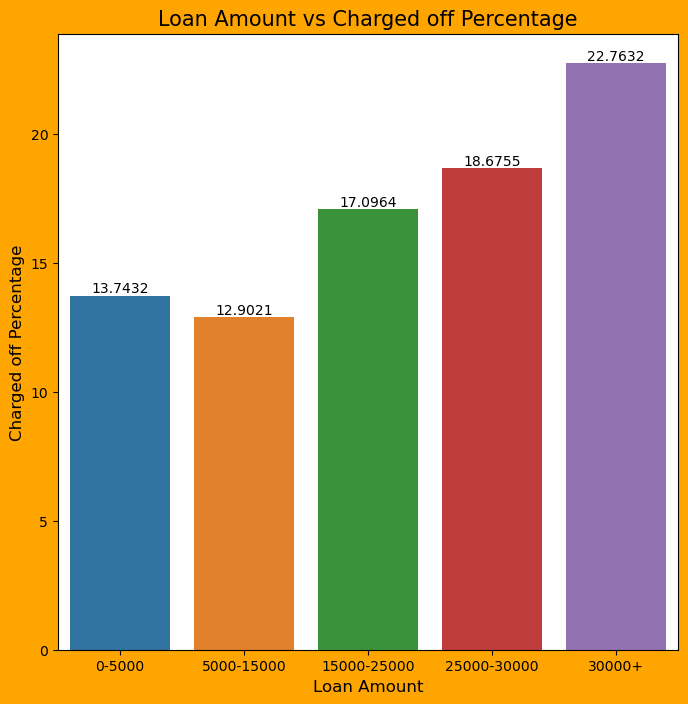

In [216]:
# Bivariate Analysis - loan amount vs. charged off loans

#Let's visualise loan amount vs. charged off loans

plt.figure(figsize=(8,8), facecolor='Orange')
ax=sb.barplot(x='loan_amnt_categories', y='Chargedoff_Percentage', data=lnAmnt_loan_status)
ax.set_title('Loan Amount vs Charged off Percentage',fontsize=15,color = 'black')
ax.set_xlabel('Loan Amount',fontsize=12,color='black')
ax.set_ylabel('Charged off Percentage',fontsize=12,color = 'black')
ax.bar_label(container=ax.containers[0])
plt.show()

# Observations:
# As the loan amount is increasing the charged off rate is also increasing. For now data is very less on higher loan amount
# like 30000+ loan amount to conclude.
# But if we compare '5000-15000' and '15000-25000' above observation stands true. 
# 0-5000 segment is showing more charged off percentage than 5000-15000, which is significant. These loan would be given to 
# low annual income applicant and it is charged off even though it is a ver low loan amount.

In [217]:
# Bivariate Analysis - purpose vs. charged off

purpose_loan_status = df_ln.groupby(['purpose', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()

# Find the percentage of Charged off lons for each purpose

purpose_loan_status = total_percentage(purpose_loan_status)
print(purpose_loan_status)

loan_status             purpose  Charged Off  Current  Fully Paid    Total  \
0                           car       160.00    50.00     1332.00  1542.00   
1                   credit_card       537.00   102.00     4450.00  5089.00   
2            debt_consolidation      2752.00   580.00    15165.00 18497.00   
3                   educational        55.00     0.00      268.00   323.00   
4              home_improvement       338.00    97.00     2459.00  2894.00   
5                         house        58.00    14.00      299.00   371.00   
6                major_purchase       220.00    37.00     1909.00  2166.00   
7                       medical       106.00    12.00      568.00   686.00   
8                        moving        91.00     7.00      479.00   577.00   
9                         other       629.00   126.00     3203.00  3958.00   
10             renewable_energy        19.00     1.00       81.00   101.00   
11               small_business       472.00    74.00     1251.0

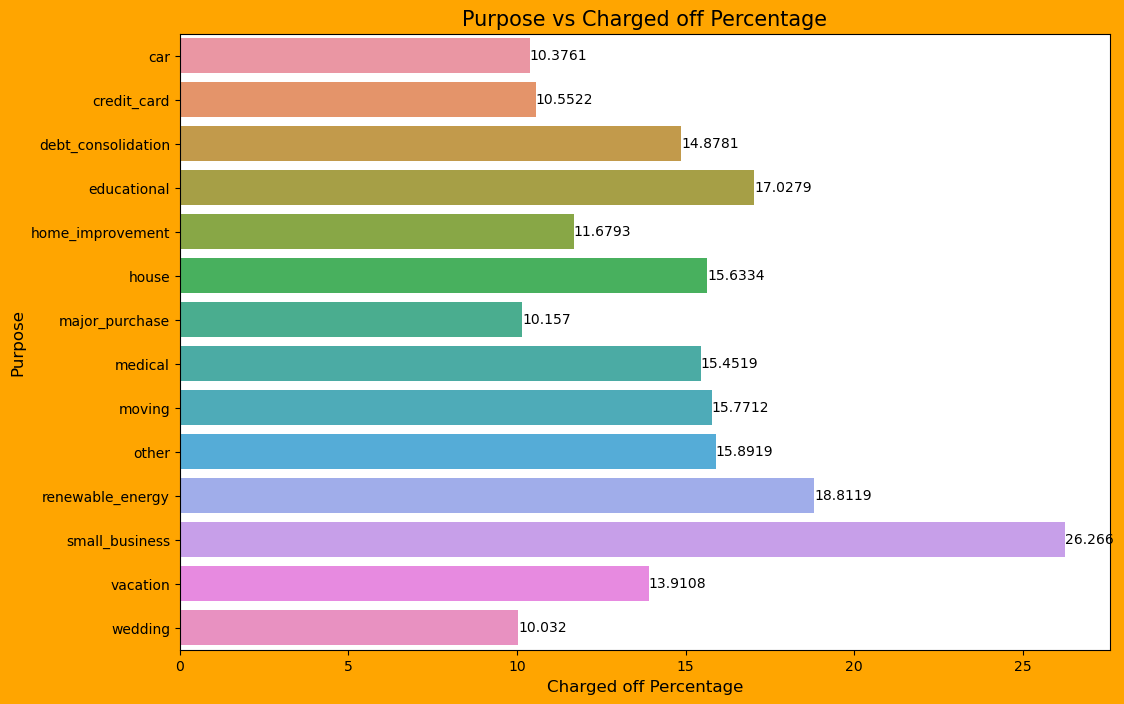

In [218]:
#Bivariate Analysis - purpose vs. Charged off 

plt.figure(figsize=(12,8), facecolor='Orange')
ax=sb.barplot(x='Chargedoff_Percentage', y='purpose', data=purpose_loan_status)
ax.set_title('Purpose vs Charged off Percentage',fontsize=15,color = 'black')
ax.set_xlabel('Charged off Percentage',fontsize=12,color='black')
ax.set_ylabel('Purpose',fontsize=12,color = 'black')
ax.bar_label(container=ax.containers[0])
#plt.xticks(rotation=90)
plt.show()

# Observations:
# Small business loans are charged off more. That means small businesses taking loans are at higher risk to be charged off due to
# not being able to make immediate returns on their investments or other reasons. 
# Compared to other reasons, "debt_consolidation" and "Other" are good in numbers and their percentage of charged off are close to
# 15%, which shows more risk.
# Car, credit card, major purchases and wedding looks more genuine reasons as their percentage of getting charged off is less.

In [219]:
# Bivariate Analysis - Home ownership vs. Charged off 

In [220]:
# Bivariate Analysis - Home ownership vs. Charged off

# Find the percentage of Chareged off loans against home ownership categories

homeOwn_vs_lnstatus = df_ln.groupby(['home_ownership', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()

# Find the percentage of Charged off lons for each purpose

homeOwn_vs_lnstatus = total_percentage(homeOwn_vs_lnstatus)
print(homeOwn_vs_lnstatus)

loan_status home_ownership  Charged Off  Current  Fully Paid    Total  \
0                 MORTGAGE      2302.00   628.00    14448.00 17378.00   
1                     NONE         0.00     0.00        3.00     3.00   
2                    OTHER        18.00     0.00       78.00    96.00   
3                      OWN       440.00    82.00     2507.00  3029.00   
4                     RENT      2824.00   416.00    15573.00 18813.00   

loan_status  Chargedoff_Percentage  
0                            13.25  
1                             0.00  
2                            18.75  
3                            14.53  
4                            15.01  


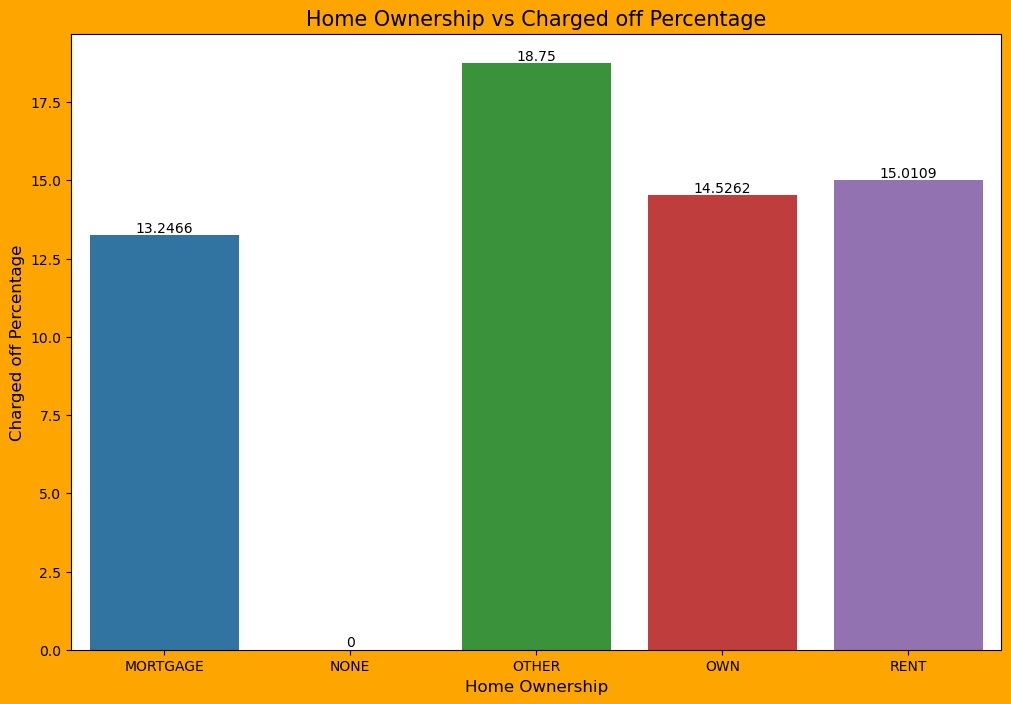

In [221]:
# Bivariate Analysis - Home ownership vs. Charged Off loans

plt.figure(figsize=(12,8), facecolor='Orange')
ax=sb.barplot(x='home_ownership', y='Chargedoff_Percentage', data=homeOwn_vs_lnstatus)
ax.set_title('Home Ownership vs Charged off Percentage',fontsize=15,color = 'black')
ax.set_xlabel('Home Ownership',fontsize=12,color='black')
ax.set_ylabel('Charged off Percentage',fontsize=12,color = 'black')
ax.bar_label(container=ax.containers[0])
plt.show()

# Observations:
# "Other" seem to have higher number of charged off loans, but there is very less data to conclude over it.
# Applicants having Mortgaged or Rented house are more in number and based on that their data shows the risk of getting charged off.
# But again there is less applicants data who owns the house and have more or less same pattern. So from home_ownership, it can't
# be conclude on risk.

In [222]:
# Bivariate Analysis - Interest Rate vs. Charged Off loans

# Derive a new column from int_rate for bivariate analysis
# Categorise it in smaller buckets and lable it.

df_ln['int_rate_categories'] = pd.cut(df_ln.int_rate, [0, 10, 15, 20, 26], labels=['0-10', '10-15', '15-20', '20+']) 
print(df_ln.head())

        id  loan_amnt  funded_amnt  funded_amnt_inv        term  int_rate  \
0  1077501       5000         5000          4975.00   36 months     10.65   
1  1077430       2500         2500          2500.00   60 months     15.27   
2  1077175       2400         2400          2400.00   36 months     15.96   
3  1076863      10000        10000         10000.00   36 months     13.49   
4  1075358       3000         3000          3000.00   60 months     12.69   

   installment grade sub_grade  emp_length  ... last_credit_pull_d  \
0       162.87     B        B2          10  ...             May-16   
1        59.83     C        C4           1  ...             Sep-13   
2        84.33     C        C5          10  ...             May-16   
3       339.31     C        C1          10  ...             Apr-16   
4        67.79     B        B5           1  ...             May-16   

   collections_12_mths_ex_med policy_code acc_now_delinq  \
0                        0.00           1              0

In [223]:
# Bivariate Analysis - Interest Rate vs. Charged Off loans

# Summarize the loan status across interest rate categories.

intRate_vs_chargedoff = df_ln.groupby(['int_rate_categories', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
print(intRate_vs_chargedoff)

# Observations:
# It shows higher the interest rate, more is the default rate.
# Let's see it visually.

loan_status int_rate_categories  Charged Off  Current  Fully Paid
0                          0-10          825       77       11403
1                         10-15         2694      525       15404
2                         15-20         1775      424        5350
3                           20+          290      100         452


In [224]:
# Bivariate Analysis - Interest Rate vs. Charged Off loans

# Find charged off loan's percentage for each loan category we defined.

intRate_vs_chargedoff = total_percentage(intRate_vs_chargedoff)
print(intRate_vs_chargedoff)

loan_status int_rate_categories  Charged Off  Current  Fully Paid  Total  \
0                          0-10          825       77       11403  12305   
1                         10-15         2694      525       15404  18623   
2                         15-20         1775      424        5350   7549   
3                           20+          290      100         452    842   

loan_status  Chargedoff_Percentage  
0                             6.70  
1                            14.47  
2                            23.51  
3                            34.44  


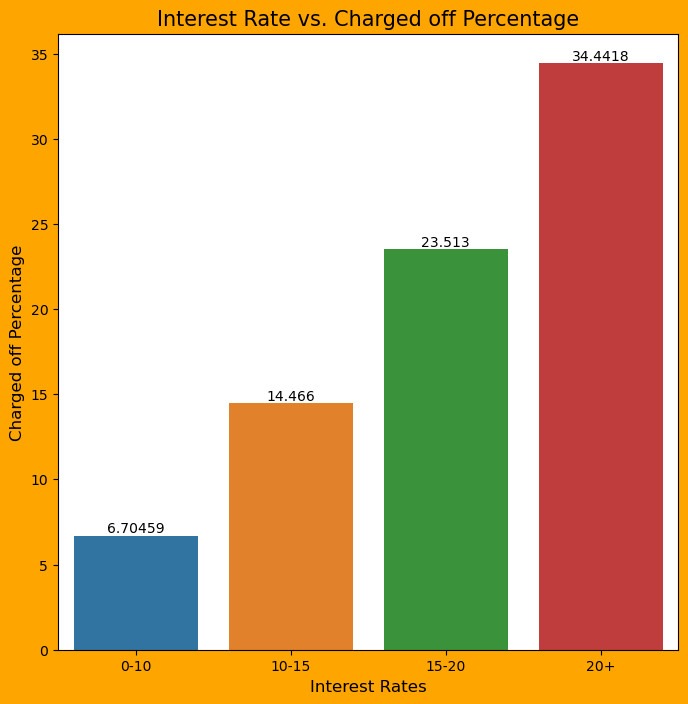

In [225]:
# Bivariate Analysis - Interest Rate vs. Charged Off loans

plt.figure(figsize=(8,8), facecolor='Orange')
ax=sb.barplot(x='int_rate_categories', y='Chargedoff_Percentage', data=intRate_vs_chargedoff)
ax.set_title('Interest Rate vs. Charged off Percentage',fontsize=15,color = 'black')
ax.set_xlabel('Interest Rates',fontsize=12,color='black')
ax.set_ylabel('Charged off Percentage',fontsize=12,color = 'black')
ax.bar_label(container=ax.containers[0])
plt.show()

# Observations:
# It clearly shows that with the increasing rate of interest, risk of charge off is also increasing.
# Above 15% interest rate, charged off loans rate is drastically increasing.

In [226]:
# Bivariate Analysis - grade vs. Charged Off loans

# Find the percentage of Chareged off loans against home ownership categories

grade_vs_lnstatus = df_ln.groupby(['grade', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()

# Find the percentage of Charged off lons for each purpose

grade_vs_lnstatus = total_percentage(grade_vs_lnstatus)
print(grade_vs_lnstatus)

# Observations:
# From the percentage it is clear that it is aligned with the interest rate vs charged off.
# Let's see the visual presentation of it.

loan_status grade  Charged Off  Current  Fully Paid  Total  \
0               A          601       40        9377  10018   
1               B         1414      344       10167  11925   
2               C         1342      262        6411   8015   
3               D         1112      216        3916   5244   
4               E          704      176        1906   2786   
5               F          312       71         642   1025   
6               G           99       17         190    306   

loan_status  Chargedoff_Percentage  
0                             6.00  
1                            11.86  
2                            16.74  
3                            21.21  
4                            25.27  
5                            30.44  
6                            32.35  


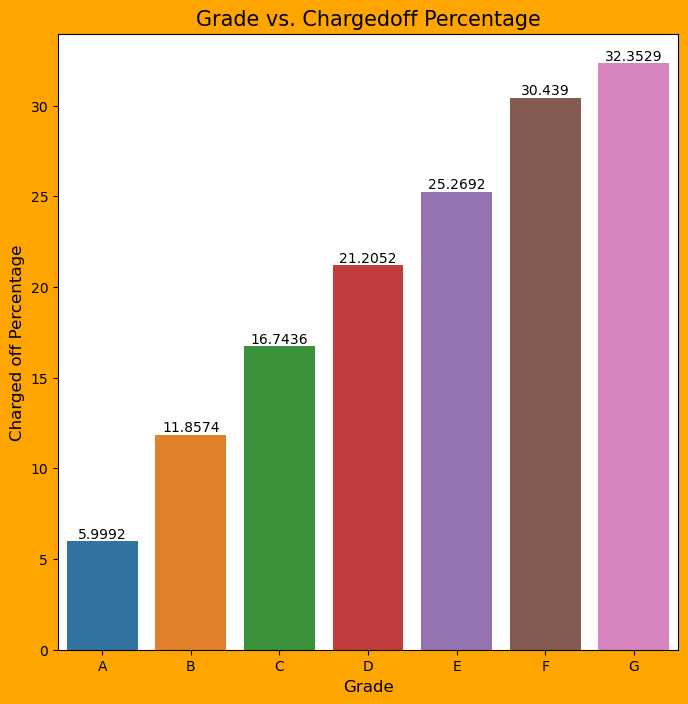

In [227]:
# Bivariate Analysis - grade vs. Charged Off loans

plt.figure(figsize=(8,8), facecolor='Orange')
ax=sb.barplot(x='grade', y='Chargedoff_Percentage', data=grade_vs_lnstatus)
ax.set_title('Grade vs. Chargedoff Percentage',fontsize=15,color = 'black')
ax.set_xlabel('Grade',fontsize=12,color='black')
ax.set_ylabel('Charged off Percentage',fontsize=12,color = 'black')
ax.bar_label(container=ax.containers[0])
plt.show()

# Observations:
# Same like interest rate vs. chargedoff percentage as the grade moves from A to G, the default rate increases. 
# Grade follows increasing interest rate as it moves from A -> G.
# Higher the interest rate more the chances of charged off.

In [228]:
# Bivariate Analysis - employment length vs. Charged off loans

# Find the percentage of Chareged off loans against home ownership categories

empLen_vs_lnstatus = df_ln.groupby(['emp_length', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()

# Find the percentage of Charged off lons for each purpose

empLen_vs_lnstatus = total_percentage(empLen_vs_lnstatus)
print(empLen_vs_lnstatus)


loan_status  emp_length  Charged Off  Current  Fully Paid  Total  \
0                     0          227       42         801   1070   
1                     1         1090      143        6533   7766   
2                     2          561       97        3684   4342   
3                     3          551       82        3426   4059   
4                     4          456       94        2860   3410   
5                     5          456       87        2712   3255   
6                     6          305       58        1846   2209   
7                     7          262       62        1435   1759   
8                     8          203       43        1216   1462   
9                     9          157       32        1058   1247   
10                   10         1316      386        7038   8740   

loan_status  Chargedoff_Percentage  
0                            21.21  
1                            14.04  
2                            12.92  
3                            13.57 

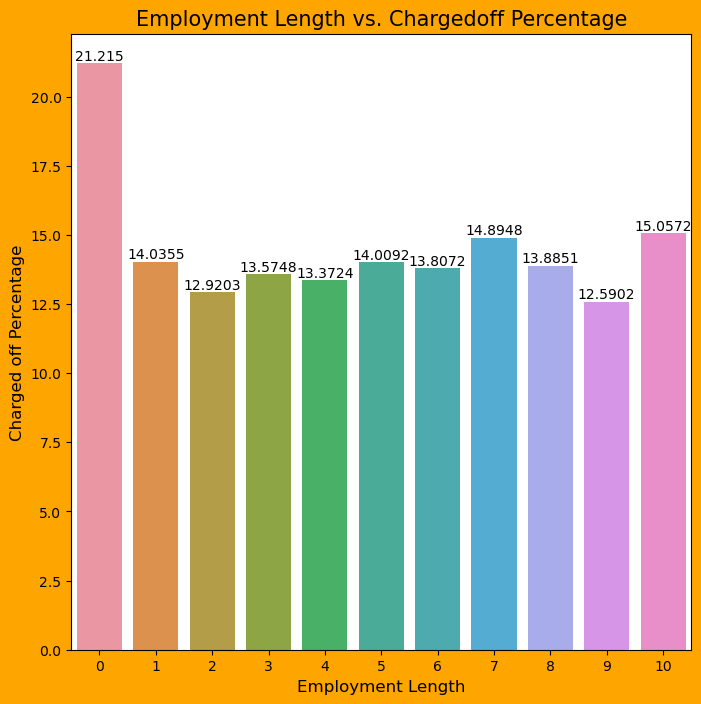

In [229]:
# Bivariate Analysis - employment length vs. Charged off loans

plt.figure(figsize=(8,8), facecolor='Orange')
ax=sb.barplot(x='emp_length', y='Chargedoff_Percentage', data=empLen_vs_lnstatus)
ax.set_title('Employment Length vs. Chargedoff Percentage',fontsize=15,color = 'black')
ax.set_xlabel('Employment Length',fontsize=12,color='black')
ax.set_ylabel('Charged off Percentage',fontsize=12,color = 'black')
ax.bar_label(container=ax.containers[0])
plt.show()

# Observations
# As expected, employment time zero or less than one month would not be earning or having money to repay the loan and so the 
# charged off rate is high for those applicants with less than one month of employment.
# For others it is more or less similar pattern of default.


In [244]:
# Bivariate Analysis - pub_rec_bankruptcies (Bankruptcy records) vs. Charged off Percentage
df_ln['pub_rec_bankruptcies'].describe()

# Observation:
# It seems there are some null records there

count   38631.00
mean        0.04
std         0.21
min         0.00
25%         0.00
50%         0.00
75%         0.00
max         2.00
Name: pub_rec_bankruptcies, dtype: float64

In [245]:
# Bivariate Analysis - pub_rec_bankruptcies (Bankruptcy records) vs. Charged off Percentage

df_ln.pub_rec_bankruptcies.isnull().sum()

# Observation
# There are 688 records having null value.


688

In [246]:
# Bivariate Analysis - pub_rec_bankruptcies (Bankruptcy records) vs. Charged off Percentage
# replace null with 'Unknown'
df_ln.pub_rec_bankruptcies.fillna('Unknown',inplace=True)
df_ln.pub_rec_bankruptcies.isnull().sum()

# Observation
# After replacing wtih 'Unknown', there are 0 null now.

0

In [247]:
# Bivariate Analysis - pub_rec_bankruptcies (Bankruptcy records) vs. Charged off Percentage

# Find the percentage of Chareged off loans against home ownership categories

bankruptcy_vs_lnstatus = df_ln.groupby(['pub_rec_bankruptcies', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()

# Find the percentage of Charged off lons for each purpose

bankruptcy_vs_lnstatus = total_percentage(bankruptcy_vs_lnstatus)
print(bankruptcy_vs_lnstatus)

loan_status pub_rec_bankruptcies  Charged Off  Current  Fully Paid    Total  \
0                           0.00      5101.00  1087.00    30766.00 36954.00   
1                           1.00       365.00    37.00     1268.00  1670.00   
2                           2.00         2.00     2.00        3.00     7.00   
3                        Unknown       116.00     0.00      572.00   688.00   

loan_status  Chargedoff_Percentage  
0                            13.80  
1                            21.86  
2                            28.57  
3                            16.86  


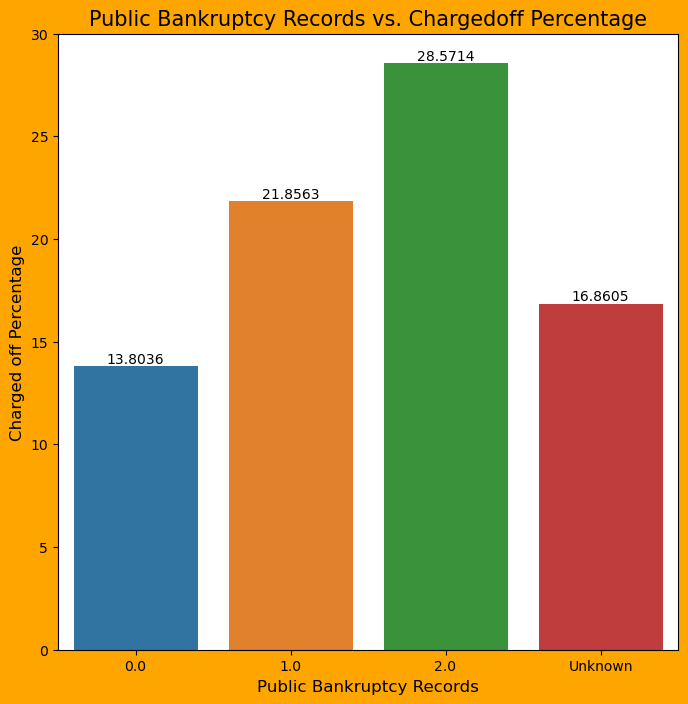

In [249]:
# Bivariate Analysis - pub_rec_bankruptcies (Bankruptcy records) vs. Charged off Percentage
plt.figure(figsize=(8,8), facecolor='Orange')
ax=sb.barplot(x='pub_rec_bankruptcies', y='Chargedoff_Percentage', data=bankruptcy_vs_lnstatus)
ax.set_title('Public Bankruptcy Records vs. Chargedoff Percentage',fontsize=15,color = 'black')
ax.set_xlabel('Public Bankruptcy Records',fontsize=12,color='black')
ax.set_ylabel('Charged off Percentage',fontsize=12,color = 'black')
ax.bar_label(container=ax.containers[0])
plt.show()

# Observations:
# People who has 0 bankruptcy also defaults the loan. Number of loans are more with 0.
# People with 1 and 2 are having higher percentage of default the laon but numbers are low to conclude.
# But there are high chances of default for those who has record of bankruptcy.